In [0]:
import tensorflow as tf

In [0]:
tf.keras.losses.M

In [0]:
import tensorflow_datasets as tfds

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [0]:
dataset_train,dataset_test=dataset['train'],dataset['test']

NameError: ignored

In [0]:
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [0]:
num_train=metadata.splits['train'].num_examples
num_test=metadata.splits['test'].num_examples

In [0]:
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return(images,labels)

In [0]:
dataset_train=dataset_train.map(normalize)

In [0]:
dataset_test=dataset_test.map(normalize)

In [0]:
CLOTH_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

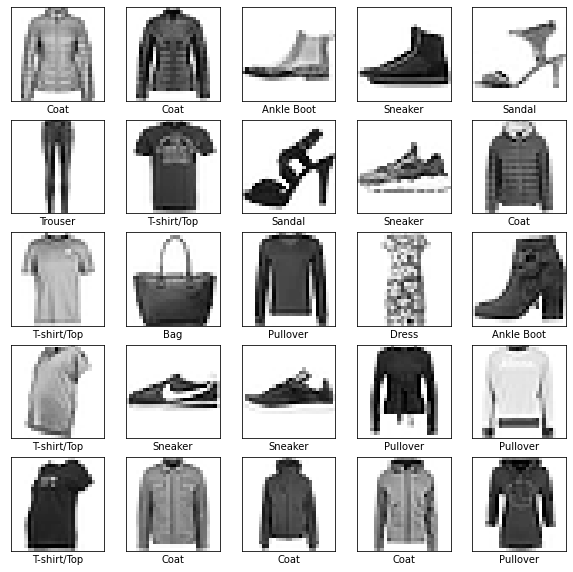

In [0]:
plt.figure(figsize=(10,10))
i=0
for image,label in dataset_test.take(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(CLOTH_name[label.numpy()])
  plt.imshow(image.numpy().reshape(28,28),cmap=plt.cm.Greys)
 
  i+=1

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,input_shape=(28, 28, 1)),tf.keras.layers.MaxPooling2D((2, 2), strides=2),tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),tf.keras.layers.MaxPooling2D((2, 2), strides=2),tf.keras.layers.Dropout(0.2),tf.keras.layers.Flatten(),tf.keras.layers.Dense(units=128,activation=tf.nn.relu),tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
dataset_train=dataset_train.repeat().shuffle(num_train).batch(32)
dataset_test=dataset_test.batch(32)

In [0]:
import math

In [0]:
model.fit(dataset_train,epochs=5,steps_per_epoch=math.ceil(num_train/32))

Epoch 1/5
 723/1875 [==========>...................] - ETA: 50s - loss: 0.5330 - accuracy: 0.8077

In [0]:
loss,accu=model.evaluate(dataset_test,steps=math.ceil(num_test/32))

313/313 [==============================] - 3s 10ms/step - loss: 0.0302 - accuracy: 0.9908


In [0]:
print(accu)

0.9908000230789185


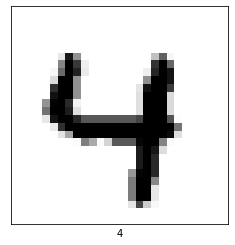

In [0]:
for img,lbl in dataset_test.take(25):
  prediction=model.predict(img)
  plt.imshow(img[2].numpy().reshape(28,28),cmap=plt.cm.Greys)
  plt.xlabel(CLOTH_name[np.argmax(prediction[2])])
  plt.xticks([])
  plt.yticks([])
  break